# Telco Churn Predictions

## Question: Why are customers churning? 

### Goals: Predict which customers are going to churn and what features are causing churn.
(Baseline of 60% churn***)

### Data Dictionary
(Alphabetical Order)

**Churn:** whether or not a customer has defected; represented as 0 == churn, 1 == not churned 

**Contract Type:** type of contract a person has, represented as month-to-month, one year, two year. I will drop this column in the prepare stage since it is a duplicate of contract type id. I brought it in originally with the data in order to explore the entire dataset. 

**Contract Type ID:** type of contract a customer has; represented as 1 == month-to-month, 2 == 1 year, 3 == 2 year

**Customer ID:** unique identifier for each customer, represented with 10 characters

**Dependents:** whether a customer has any dependents or not, represented as 0 == no dependents, 1 == dependents. I dropped this column because I combined it with partner to create 'family' column. 

**Family:** single column combined from dependents and partner columns, represented as 0 == does not have family member, 1 == has family member

**Gender:** whether a customer is male or female, represented as 0 == male, 1 == female

**Internet Service Type:** type of internet service a person has, represented as DSL, Fiber Optic, None. I will drop this column in the prepare stage since it is a duplicate of internet service type id. I brought it in originally with the data in order to explore the entire dataset.

**Internet Service Type ID:** type of internet service a customer has, represented as 1 == DSL, 2 == Fiber Optic, 3 == None

**Monthly Charges:** amount of charges per month

**Paperless Billing:** whether a customer has paperless billing or not, represented as 0 == inactive paperless billing, 1 == active paperless billing

**Partner:** whether a customer has a partner or not, represented as 0 == no partner, 1 == has partner. I dropped this column to combine with dependents to create 'family' and condense the dataframe. 

**Payment Type:** type of payment setup for a customer represented as Electronic Check, Mail Check, Bank Transfer (auto), Credit Card (auto). I will drop this column because it is a duplicate of payment type id. I brought it in originally with the data in order to explore the entire dataset.

**Payment Type ID:** type of payment setup for a customer represented as 1 == Electronic Check, 2 == Mail Check, 3 == Bank Transfer (auto), 4 == Credit Card (auto)

**Phone Service:** whether a customer has phone service or not, represented as 0 == no phone service, 1 == has phone service 

**Senior Citizen:** whether a customer is a senior or not, represented as 0 == not a senior citizen, 1 == senior citizen

**Streaming Movies:** whether a customer has streaming movies service or not, represented as 0 == not having movie streaming services, 1 == having movie streaming services. I dropped this column to create streaming service column from this column and streaming tv column.

**Streaming Services:** whether a customer has a streaming service, represented as 0 == does not have a streaming service, 1 == has a streaming service.

**Streaming TV:** whether a customer has streaming tv service or not, represented as 0 == not having tv streaming services, 1 == has tv streaming services. I dropped this column to create streaming service column from this column and streaming movies column.

**Tech Supoort:**  whether a customer has tech support or not, represented as 0 == not having tech support, 1 == has tech support

**Tenure:** number of months a customer was/or continues to be a customer

**Total Charges:** amount of charges over full tenure as customer

### Imports
Import the necessary libraries needed to create predictive models.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier

from util import get_db_url
import acquire
import prepare
import split_scale
import feature_selection

- I am bringing in the data using functions I created that bring in a clean, working dataframe.

**Task:** Look at the dataframe information, then create a baseline model.

In [2]:
df = acquire.acquire_telco()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
0,2,1,1,0003-MKNFE,Male,0,9,Yes,Yes,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,False,True
1,4,1,1,0013-MHZWF,Female,0,9,Yes,No,No,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),True,True
2,1,1,1,0015-UOCOJ,Female,1,7,Yes,No,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,False,False
3,1,1,1,0023-HGHWL,Male,1,1,No,No phone service,No,...,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,False,False
4,3,1,1,0032-PGELS,Female,0,1,No,No phone service,Yes,...,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),True,False


In [3]:
df.shape

(7032, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
paperless_billing           7032 non-null object
monthly_charges             7032 non-null float64
total_charges               7032 non-null float64
churn                       7032 non-null object
contract_type               7032 non-null object
internet_servi

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7032.0,2.315557,1.149523,1.00,1.0000,2.000,3.0000,4.00
internet_service_type_id,7032.0,1.872582,0.737271,1.00,1.0000,2.000,2.0000,3.00
contract_type_id,7032.0,1.688567,0.832934,1.00,1.0000,1.000,2.0000,3.00
senior_citizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
monthly_charges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


#### Rate of Churn
- Calculate the rate of churn thus far in the data for a starting point.

In [6]:
churn_rate = df.churn.value_counts()
basic_churn_df = pd.DataFrame(churn_rate) 
basic_churn_df

,churn
No,5163
Yes,1869


In [7]:
churn_rate_base = 1869/7032
print(churn_rate_base)

0.26578498293515357


**Takeaway:** If I was to guess that no customers would not churn, I would be right about 73% of the time.

### Baseline Model: Decision Tree
- This baseline model will use three numeric features: tenure, monthy charges and total charges. I chose these features at random since they are already numeric values to get a baseline.
- In order to predict churn, I will need to first make 'churn' a numeric value as well by encoding the column.
- I will use a Decision Tree model because it is a relatively simple model to create.

In [8]:
base_encoder = LabelEncoder()
df.churn = base_encoder.fit_transform(df.churn)
df.churn.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

In [9]:
X = df[['tenure', 'monthly_charges', 'total_charges']]
y = df[['churn']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [12]:
y_pred = clf.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [13]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.36346516, 0.63653484],
       [0.91964286, 0.08035714],
       [0.87067395, 0.12932605],
       ...,
       [0.87067395, 0.12932605],
       [0.63268156, 0.36731844],
       [0.36346516, 0.63653484]])

#### Evaluate Baseline Model

In [14]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [15]:
confusion_matrix(y_train, y_pred)

array([[3298,  327],
       [ 684,  613]])

In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3625
           1       0.65      0.47      0.55      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.69      0.71      4922
weighted avg       0.78      0.79      0.78      4922



**Takeaways:** The accuracy score for this baseline model is at about 79%. We must also look at the precision, recall and f1-score for those who have churned when comparing models moving forward. This baseline model performs better than the 60% 

### Model 2: Encoded Decision Tree
- In order to run another model, I am going to recall the data for a fresh start to make adjustments for another model.
- I will set the customer id as the index, since I do not want to get rid of it and the values in that column will not be encoded.
- I will perform any necessary changes needed with functions I have already created.

**Task:** Split and encode the data.

In [17]:
df = acquire.acquire_telco()
df.set_index('customer_id', inplace=True)
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,family,streaming_services
customer_id,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,2,1,1,Male,0,9,Yes,Yes,No,No,...,No,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,False,True
0013-MHZWF,4,1,1,Female,0,9,Yes,No,No,No,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),True,True
0015-UOCOJ,1,1,1,Female,1,7,Yes,No,Yes,No,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,False,False
0023-HGHWL,1,1,1,Male,1,1,No,No phone service,No,No,...,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check,False,False
0032-PGELS,3,1,1,Female,0,1,No,No phone service,Yes,No,...,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic),True,False


In [18]:
train, test = split_scale.split_my_data(df)
train.shape
test.shape

(2110, 21)

In [19]:
train_encode, test_encode = prepare.encode(train, test)
train_encode.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,family,streaming_services
customer_id,,,,,,,,,,,,,,,,,,
3866-MDTUB,1,1,1,0,0,2,1,0,2,0,0,0,1,70.75,146.90,1,0,1
5555-RNPGT,4,3,1,1,0,10,1,2,1,1,1,1,0,24.80,223.90,0,1,0
3727-OWVYD,2,1,2,1,0,35,1,0,2,2,2,0,0,61.20,2021.20,0,0,0
2270-CHBFN,4,2,1,0,0,44,1,2,2,2,2,2,1,95.10,4060.55,0,1,0
6892-XPFPU,1,2,1,1,1,24,1,2,0,2,2,0,1,104.25,2433.90,1,1,1


In [20]:
X_train = train_encode.drop(['churn'],axis=1)
y_train = train_encode[['churn']]
X_test = test_encode.drop(['churn'],axis=1)
y_test = test_encode[['churn']]

- After tidying up the data, I will not plug it into a decision tree to test if more features will get better results than just the three features previously chosen.

In [21]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [22]:
y_pred = clf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.82075472, 0.17924528],
       [0.82075472, 0.17924528],
       [0.95263158, 0.04736842],
       ...,
       [0.95263158, 0.04736842],
       [0.82075472, 0.17924528],
       [0.51969504, 0.48030496]])

Evaluate Model 2

In [24]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [25]:
print(confusion_matrix(y_train, y_pred))

[[3368  257]
 [ 775  522]]


In [26]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3625
           1       0.67      0.40      0.50      1297

    accuracy                           0.79      4922
   macro avg       0.74      0.67      0.69      4922
weighted avg       0.78      0.79      0.77      4922



**Takeaways:** The accuracy of the model is the same, though the precision, recall and f1-scores vary a little bit.

### Explore

- Using the encoded data, I will now look at the correlation between all features to then find the best features to use in my predictive model.

- I will begin by looking at the distribution of churn.

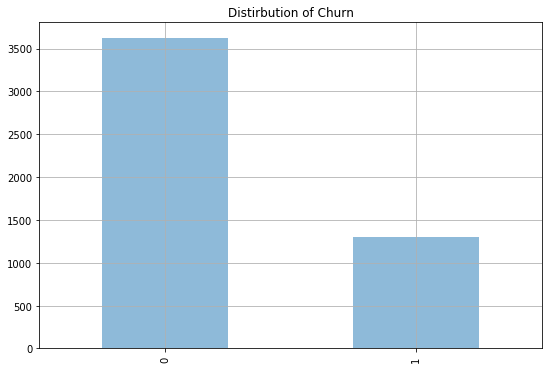

In [27]:
plt.figure(figsize=(9,6))
y_train.churn.value_counts().sort_index().plot(kind = "bar", alpha = .5)
plt.title("Distirbution of Churn")
plt.grid(b = True , which = "major")

**Takeaway:** Significantly less people have churned (1) vs. people who have not churned (0) in our data.

Text(0.5, 1.0, 'Churn Rate vs. Tenure in Months')

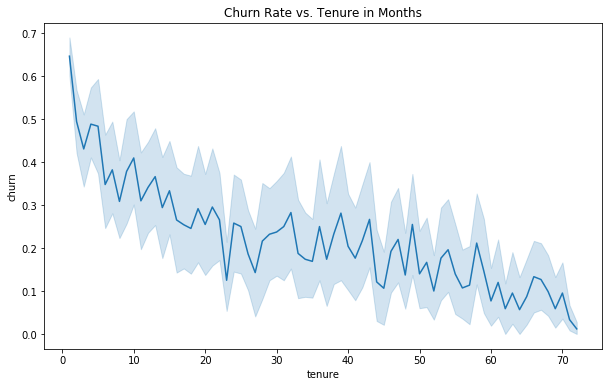

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='tenure', y='churn', data=train_encode)
plt.title("Churn Rate vs. Tenure in Months")

**Takeaway:** More people churned in the early months of their tenure. This could be due to different contract types, or service experiences within those first few months of tenure.

In [29]:
pd.crosstab(y_train.churn, X_train.tenure, margins=True).style.background_gradient(cmap='Blues')

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,All
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,146,90,78,66,47,45,55,65,46,49,49,56,45,36,46,36,44,43,34,38,31,47,49,46,48,48,42,29,43,45,36,33,39,38,59,24,38,33,23,39,42,36,33,29,42,42,39,44,38,43,40,54,42,41,37,50,39,41,35,48,44,48,38,50,42,52,62,64,64,76,116,250,3625
1,267,88,59,63,44,24,34,29,28,34,22,29,26,15,23,13,15,14,14,13,13,17,7,16,16,11,7,8,13,14,12,13,9,8,12,8,8,10,9,10,9,10,12,4,5,10,11,7,13,7,8,6,9,10,6,6,5,11,6,4,6,3,4,3,4,8,9,7,4,8,4,3,1297
All,413,178,137,129,91,69,89,94,74,83,71,85,71,51,69,49,59,57,48,51,44,64,56,62,64,59,49,37,56,59,48,46,48,46,71,32,46,43,32,49,51,46,45,33,47,52,50,51,51,50,48,60,51,51,43,56,44,52,41,52,50,51,42,53,46,60,71,71,68,84,120,253,4922


**Takeaway:** This crosstab graph shows a count of those who have churned and those who have not churned for each month of tenure. This shows a closer look at numbers as the graph above.

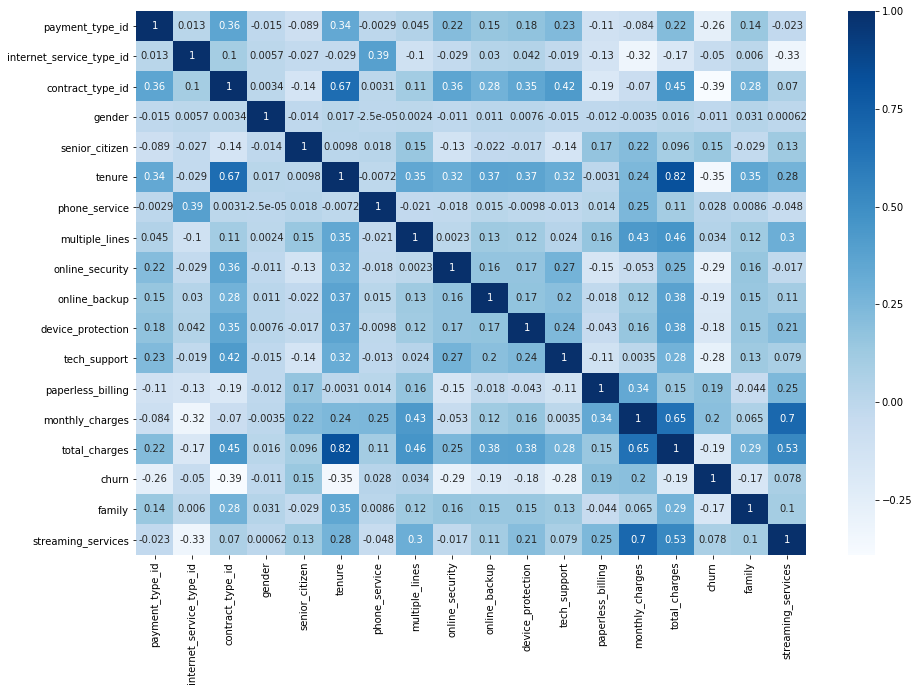

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(train_encode.corr(), cmap='Blues', annot=True)

**Takeaway:** Though nothing is extremely . highly correlated to churn, I am able to see that some correlations are much higher than others. Some features, such as gender, have no effect on churn, and will lead me to believe that that is a column I can drop later when running a model.

#### Question: Are there features that indicate a higher propensity to churn? Type of internet service?

Text(0, 0.5, 'Churn Rate')

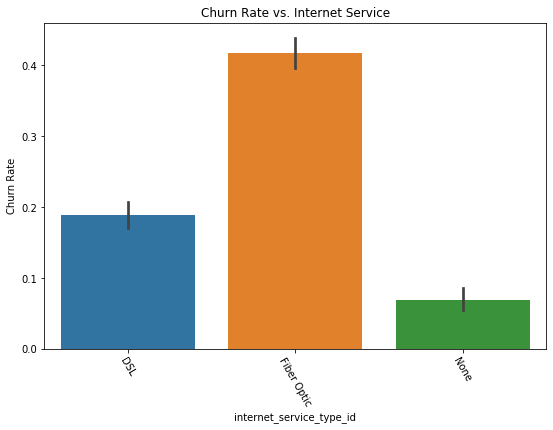

In [31]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x = "internet_service_type_id", y = "churn", data = train_encode)
ax.set_xticklabels(["DSL", "Fiber Optic", "None"])
plt.title("Churn Rate vs. Internet Service")
plt.xticks(rotation = -60)
ax.set_ylabel("Churn Rate")
# clean up x_axis label

#### Number of phone lines?

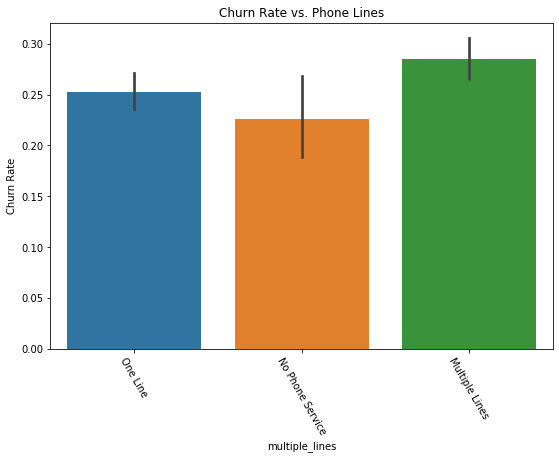

In [32]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x= "multiple_lines", y = "churn", data = train_encode)
plt.xticks(rotation = -60)
plt.title("Churn Rate vs. Phone Lines")
ax.set_xticklabels(["One Line", "No Phone Service", "Multiple Lines"])
plt.xticks(rotation = -60)
ax.set_ylabel("Churn Rate")
plt.show()

#### Type of phone service?

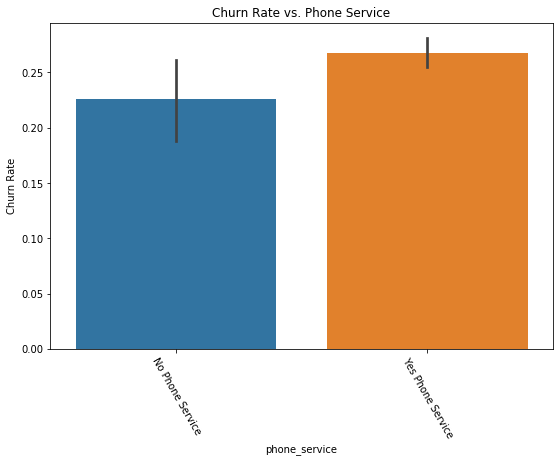

In [33]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x= "phone_service", y = "churn", data = train_encode)
plt.title("Churn Rate vs. Phone Service")
plt.xticks(rotation = -60)
ax.set_xticklabels(["No Phone Service", "Yes Phone Service"])
ax.set_ylabel("Churn Rate")
plt.show()

#### Online security? 

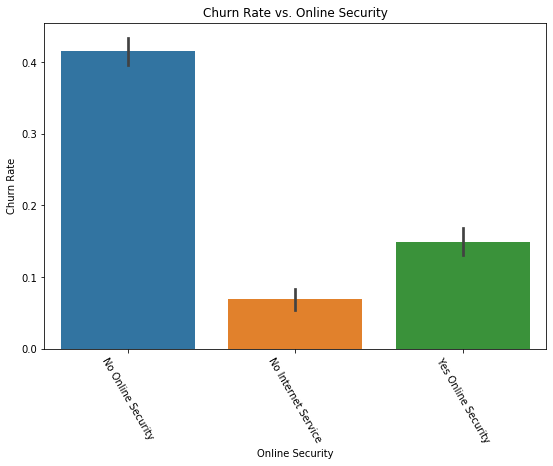

In [34]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Online Security")
ax = sns.barplot(x = "online_security", y = "churn", data = train_encode)
ax.set_xticklabels(["No Online Security","No Internet Service","Yes Online Security"])
ax.set_xlabel("Online Security")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

#### Online backup?

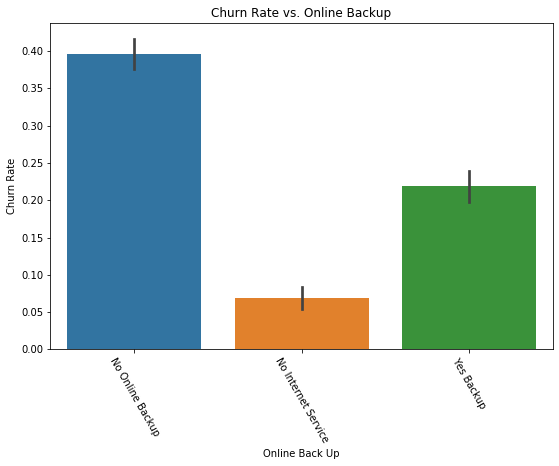

In [35]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Online Backup")
ax = sns.barplot(x = 'online_backup', y = 'churn', data=train_encode)
ax.set_xticklabels(["No Online Backup","No Internet Service","Yes Backup"])
ax.set_xlabel("Online Back Up")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

#### Is a senior citizen?

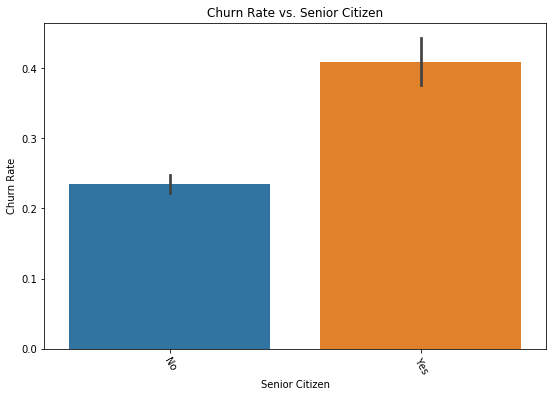

In [36]:
plt.figure(figsize=(9,6))
plt.title("Churn Rate vs. Senior Citizen")
ax = sns.barplot(x = 'senior_citizen', y ='churn', data = train_encode)
ax.set_xticklabels(["No","Yes"])
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Churn Rate")
plt.xticks(rotation = -60)
plt.show()

#### Question: Is total charges driving churn?

<Figure size 864x576 with 0 Axes>

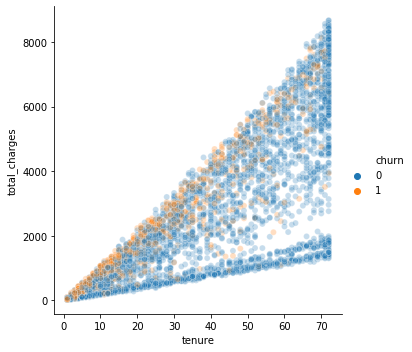

In [37]:
plt.figure(figsize=(12,8))
sns.relplot(x='tenure', y='total_charges', hue='churn', data=train_encode, alpha=.25)

**Takeaway:** You can see from this graph that the customers who churned mostly cluster around the same area, in the earlier months of tenure, but they are scattered throughout all of the tenure months. This leads me to believe that it is not the total charges that is driving churn, there must be other features that are more of a factor.

### Model 3: Random Forest
- I will now create another model using Random Forest and perform feature engineering, Select K Best, to pick the top ten features to predict churn.

In [38]:
feature_selection.select_kbest_fregression(X_train, y_train, k=10)

['payment_type_id',
 'contract_type_id',
 'tenure',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'monthly_charges',
 'total_charges']

In [39]:
X_kb_train = train_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_train = train_encode[['churn']]
X_kb_test = test_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_test = test_encode[['churn']]

In [40]:
rf_kbest = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='entropy',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [41]:
rf_kbest.fit(X_kb_train, y_kb_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [42]:
print(rf_kbest.feature_importances_)

[0.05228845 0.31427964 0.15631197 0.16219534 0.02492809 0.01098677
 0.15930342 0.00504035 0.07491582 0.03975014]


In [43]:
y_pred = rf_kbest.predict(X_kb_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
y_pred_proba = rf_kbest.predict_proba(X_kb_train)
y_pred_proba

array([[0.51707647, 0.48292353],
       [0.81120727, 0.18879273],
       [0.90012536, 0.09987464],
       ...,
       [0.92918792, 0.07081208],
       [0.64024965, 0.35975035],
       [0.47380523, 0.52619477]])

In [45]:
format(rf_kbest.score(X_kb_train, y_kb_train))

'0.7956115400243803'

In [46]:
print(confusion_matrix(y_train, y_pred))

[[3416  209]
 [ 797  500]]


In [47]:
print(classification_report(y_kb_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3625
           1       0.71      0.39      0.50      1297

    accuracy                           0.80      4922
   macro avg       0.76      0.66      0.69      4922
weighted avg       0.78      0.80      0.77      4922



**Takeaway:** This model performed better than the baseline model, with an accuracy of 80% and precision at 71%.

### Model 3 Edit: Random Forest with ALL encoded features
- I am going to add back in all of the 17 features to get a sense if using all features in Random Forest will give us better results than the Select K Best features.

In [48]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [50]:
print(rf.feature_importances_)

[5.30215503e-02 3.91552660e-02 2.72266595e-01 0.00000000e+00
 1.00578423e-04 1.41018763e-01 3.30695801e-05 7.28924539e-04
 1.43633746e-01 3.18300566e-02 2.66078150e-02 1.47093728e-01
 1.09113389e-02 4.42741624e-02 8.16678711e-02 4.66756899e-03
 2.98896700e-03]


In [51]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.54836822, 0.45163178],
       [0.84683168, 0.15316832],
       [0.89147952, 0.10852048],
       ...,
       [0.91893359, 0.08106641],
       [0.65776308, 0.34223692],
       [0.48785617, 0.51214383]])

In [53]:
format(rf.score(X_train, y_train))

'0.7947988622511174'

In [54]:
print(confusion_matrix(y_train, y_pred))

[[3439  186]
 [ 824  473]]


In [55]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3625
           1       0.72      0.36      0.48      1297

    accuracy                           0.79      4922
   macro avg       0.76      0.66      0.68      4922
weighted avg       0.78      0.79      0.77      4922



**Takeaway:** This model edit performed slightly worse than the model with Select K Best features. I will move forward with my model 3 using feature engineering.

## Final MVP Model: Model 3 Random Forest

**Task:** Run test data through chosen model without fitting it.

- Using the Select K Best features, I will now test my model to evaluate how the model runs.

In [56]:
X_kb_train = train_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_train = train_encode[['churn']]
X_kb_test = test_encode[['payment_type_id', 'contract_type_id', 'tenure', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'monthly_charges', 'total_charges']]
y_kb_test = test_encode[['churn']]

In [57]:
y_pred_test = rf_kbest.predict(X_kb_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
y_pred_proba_test = rf_kbest.predict_proba(X_kb_test)
y_pred_proba_test

array([[0.96913631, 0.03086369],
       [0.50730495, 0.49269505],
       [0.94065271, 0.05934729],
       ...,
       [0.97138451, 0.02861549],
       [0.77757097, 0.22242903],
       [0.33180263, 0.66819737]])

In [59]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_kbest.score(X_kb_test, y_kb_test)))

Accuracy of random forest classifier on training set: 0.79


In [60]:
print(confusion_matrix(y_kb_test, y_pred_test))

[[1443   95]
 [ 350  222]]


In [61]:
print(classification_report(y_kb_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1538
           1       0.70      0.39      0.50       572

    accuracy                           0.79      2110
   macro avg       0.75      0.66      0.68      2110
weighted avg       0.78      0.79      0.77      2110



## Creating a CSV File from Final Model
#### Include Customer ID, probability of churn, prediction of churn

- Concat the train and test data I used in my final model to create a dataframe for my csv.

In [62]:
df_final_csv = pd.concat([X_kb_train, X_kb_test])

In [63]:
df_final_csv.shape

(7032, 10)

- Fit my dataframe with the chosen edits that I used for the final model to the predictive model. 

In [64]:
y_pred = rf_kbest.predict(df_final_csv)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
y_pred_proba = rf_kbest.predict_proba(df_final_csv)
y_pred_proba

array([[0.51707647, 0.48292353],
       [0.81120727, 0.18879273],
       [0.90012536, 0.09987464],
       ...,
       [0.97138451, 0.02861549],
       [0.77757097, 0.22242903],
       [0.33180263, 0.66819737]])

- Create a new dataframe containing just the probabilities and predictions of churn.

In [66]:
y_predictions = pd.DataFrame({'Probability': y_pred_proba[:,1], 'Predictions': (y_pred_proba[:,1] >= .5) == 1})
y_predictions.head()

,Probability,Predictions
0,0.482924,False
1,0.188793,False
2,0.099875,False
3,0.206459,False
4,0.441711,False


- Set my index for this new dataframe as customer id to better see who is churning vs not churning.

In [67]:
y_predictions = y_predictions.set_index(df.index)
y_predictions.head()

,Probability,Predictions
customer_id,,
0003-MKNFE,0.482924,False
0013-MHZWF,0.188793,False
0015-UOCOJ,0.099875,False
0023-HGHWL,0.206459,False
0032-PGELS,0.441711,False


- Convert new dataframe into a csv file as a deliverable.

In [68]:
y_predictions.to_csv(r'probability_and_predictions.csv')